In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('../../data/kaggle_20m/movie_genres_ratings.csv')

# Splitting features and target variable
X = df.drop(columns=['movieId', 'title', 'rating'])
y = df['rating']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameters
max_depth = 5
min_samples_split = 10
min_samples_leaf = 5

# Train a Decision Tree Regressor
dt_model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

In [8]:
import numpy as np
# Evaluate the model
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_rmse = np.sqrt(dt_mse)  # Root Mean Squared Error
dt_mae = mean_absolute_error(y_test, dt_predictions)

print(f"Decision Tree MSE on Test Set: {dt_mse:.4f}")
print(f"Decision Tree RMSE on Test Set: {dt_rmse:.4f}")
print(f"Decision Tree MAE on Test Set: {dt_mae:.4f}")

Decision Tree MSE on Test Set: 0.3859
Decision Tree RMSE on Test Set: 0.6212
Decision Tree MAE on Test Set: 0.4602


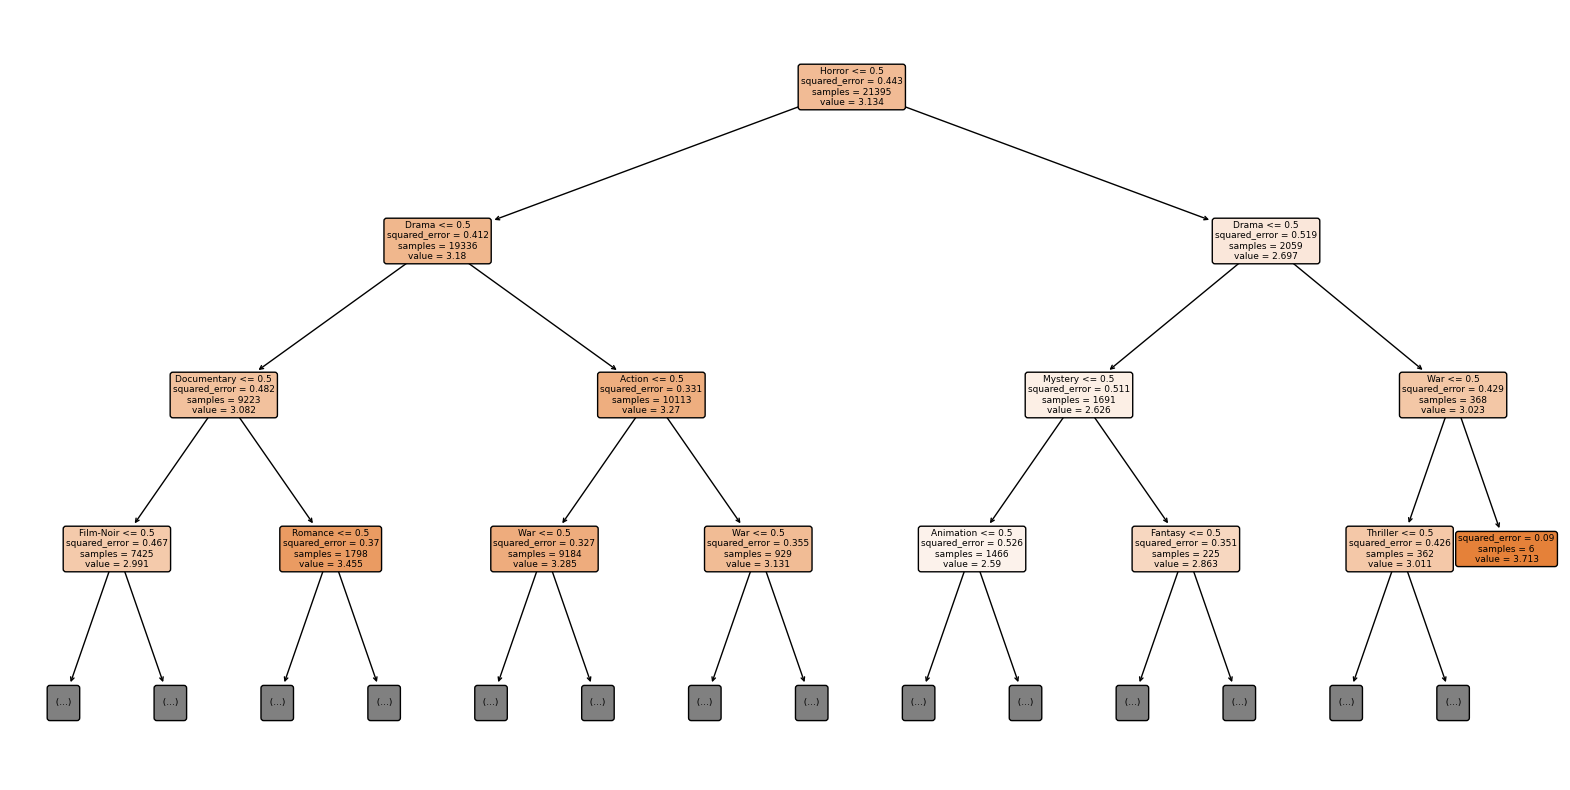

In [9]:
# Inspect the Tree (for smaller trees)
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True, max_depth=3)
plt.show()
